In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [5]:
bias = 200
X, y, coef = make_regression(n_features=1, noise=10, bias=bias, random_state=42, coef=True)

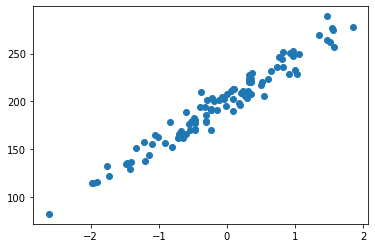

In [6]:
plt.scatter(X, y)

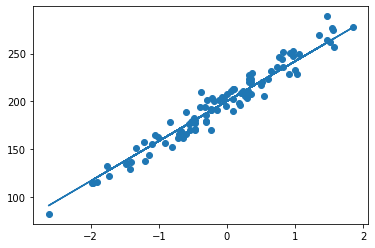

In [7]:
plt.scatter(X, y)
plt.plot(X, (X*coef + bias))

## Custom Implementation

In [8]:
class LinearRegCustom:
    # constructor
    def __init__(self, lr=0.1):
        self.lr = lr
    
    def fit(self, X, y):
        self._X = X
        self._y = y.reshape(-1, 1)
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errors = []
        for i in range(50):
            self.gradient_decend()
            errors.append(self.error())
        return errors
    
    def gradient_decend(self):
        d_coef, d_intercept = self.gradient()
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
    
    def gradient(self):
        yh = self.predict(self._X)
        d_coef = ((yh - self._y) * self._X).mean()
        d_intercept = (yh - self._y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    def error(self):
        return ((self.predict(self._X) - self._y) ** 2).sum()

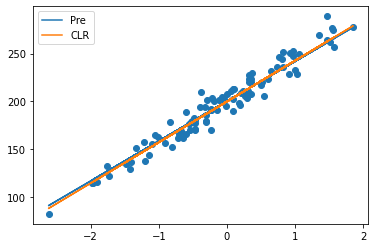

In [12]:
model = LinearRegCustom()
model.fit(X, y)
plt.scatter(X, y)
plt.plot(X, X*coef + bias, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()

## Sklearn Implementation

In [16]:
from sklearn.linear_model import LinearRegression

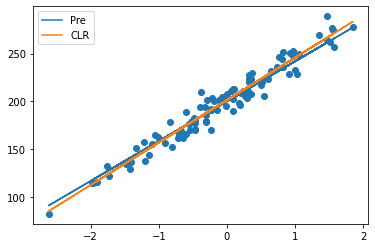

In [17]:
model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y)
plt.plot(X, X*coef + bias, label="Pre")
plt.plot(X, model.predict(X), label="CLR")
plt.legend()